In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [10]:
# Load the dataset
df = pd.read_csv("../data/Solar_Generation.csv")

In [11]:
# Convert month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['Month'] = df['Month'].map(month_mapping)  # Convert month names to numbers

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.set_index('Date', inplace=True)
df = df[['Solar Generation']]

In [12]:
# Fit SARIMA model (best seasonal ARIMA parameters can be tuned further)
model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

d:\FutureVolt\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\FutureVolt\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
# Forecast till 2030
future_dates = pd.date_range(start=df.index[-1], periods=72, freq='MS')
forecast = results.get_forecast(steps=len(future_dates))
forecast_index = future_dates
forecast_values = forecast.predicted_mean

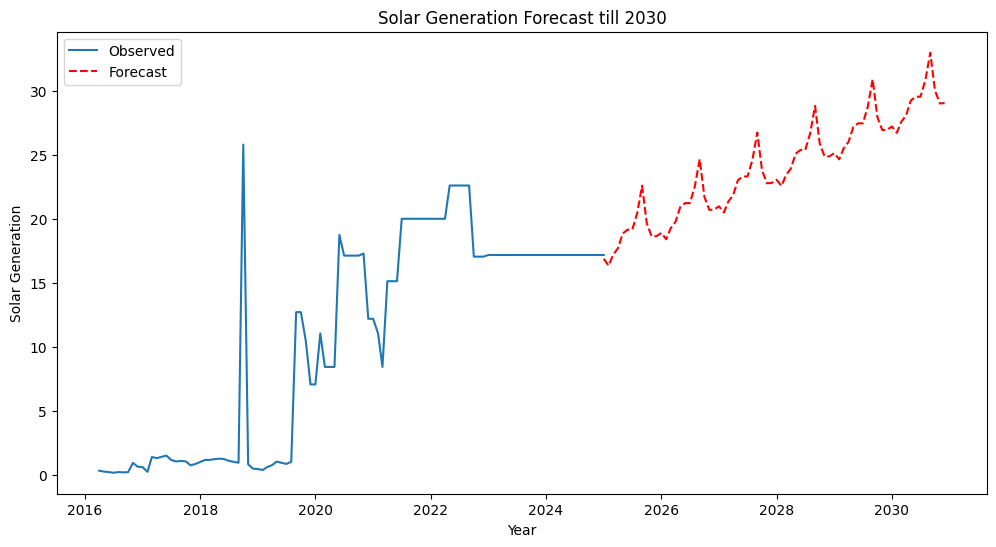

In [14]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Solar Generation'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', linestyle='dashed', color='red')
plt.xlabel('Year')
plt.ylabel('Solar Generation')
plt.legend()
plt.title('Solar Generation Forecast till 2030')
plt.show()

In [ ]:
# Save forecasted data
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecasted Solar Generation': forecast_values})
forecast_df.to_csv("../solar_forecast_2025-2030.csv", index=False)

print("Forecasting complete. Results saved to solar_data_forecast.csv")